In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys


# add path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
# parent_dir = os.path.dirname(os.path.realpath(__file__))
sys.path.append(parent_dir)
# parent_dir

In [2]:
from src.data.cube_datasets import SlicedCubeDataset, make_training_sets, make_validation_set

In [3]:
train_set, test_set = make_training_sets(
    train_test_split = (0.8, 0.2),
    stride=1,
    batch_size=256*3,
    num_workers = 64,
    redshift = 1.0,
    total_seeds = np.arange(0, 1750, 1),
    random_seed = 42,
    prefetch_factor = 10,
)

Making datasets...
Training set: 1400 seeds
Loading data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1400/1400 [25:31<00:00,  1.09s/it]


Test set: 350 seeds
Loading data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [08:17<00:00,  1.42s/it]

Making dataloaders...


List of transforms:

| idx | transform | explanation | 
|-----|-----------|-------------|
|0|original|normalised|
|1|rot90|rotated 90 degrees and normalised|
|2|rot180|rotated 180 degrees and normalised|
|3|rot270|rotated 270 degrees and normalised
|4|flipH| Horisontal flip and normalised|
|5|flipV| same as rot180 and flipH|
|6|rot90+flipH| - |
|7|rot90+flipV| same as rot270+flipH |
|8|rot180+flipH| - |
|9|rot180+flipV| same as flipH |
|10|rot270+flipH| - |
|11|rot270+flipV| same as rot90+flipH |


Therefore 9 independent versions:

| idx | transform | explanation | 
|-----|-----------|-------------|
|0|original|normalised|
|1|rot90|rotated 90 degrees and normalised|
|2|rot180|rotated 180 degrees and normalised|
|3|rot270|rotated 270 degrees and normalised
|4|flipH| Horisontal flip and normalised|
|5|flipH + rot90| - |
|6|flipH + rot180| - |
|7|flipH + rot270| - |


In [5]:
names = ["original", "rot90", "rot180", "rot270", "flipH", "flipH+rot90", "flipH+rot180", "flipH+rot270"]
orig_names = ["original", "rot90", "rot180", "rot270"]
flip_names = ["flipH", "flipH+rot90", "flipH+rot180", "flipH+rot270"]

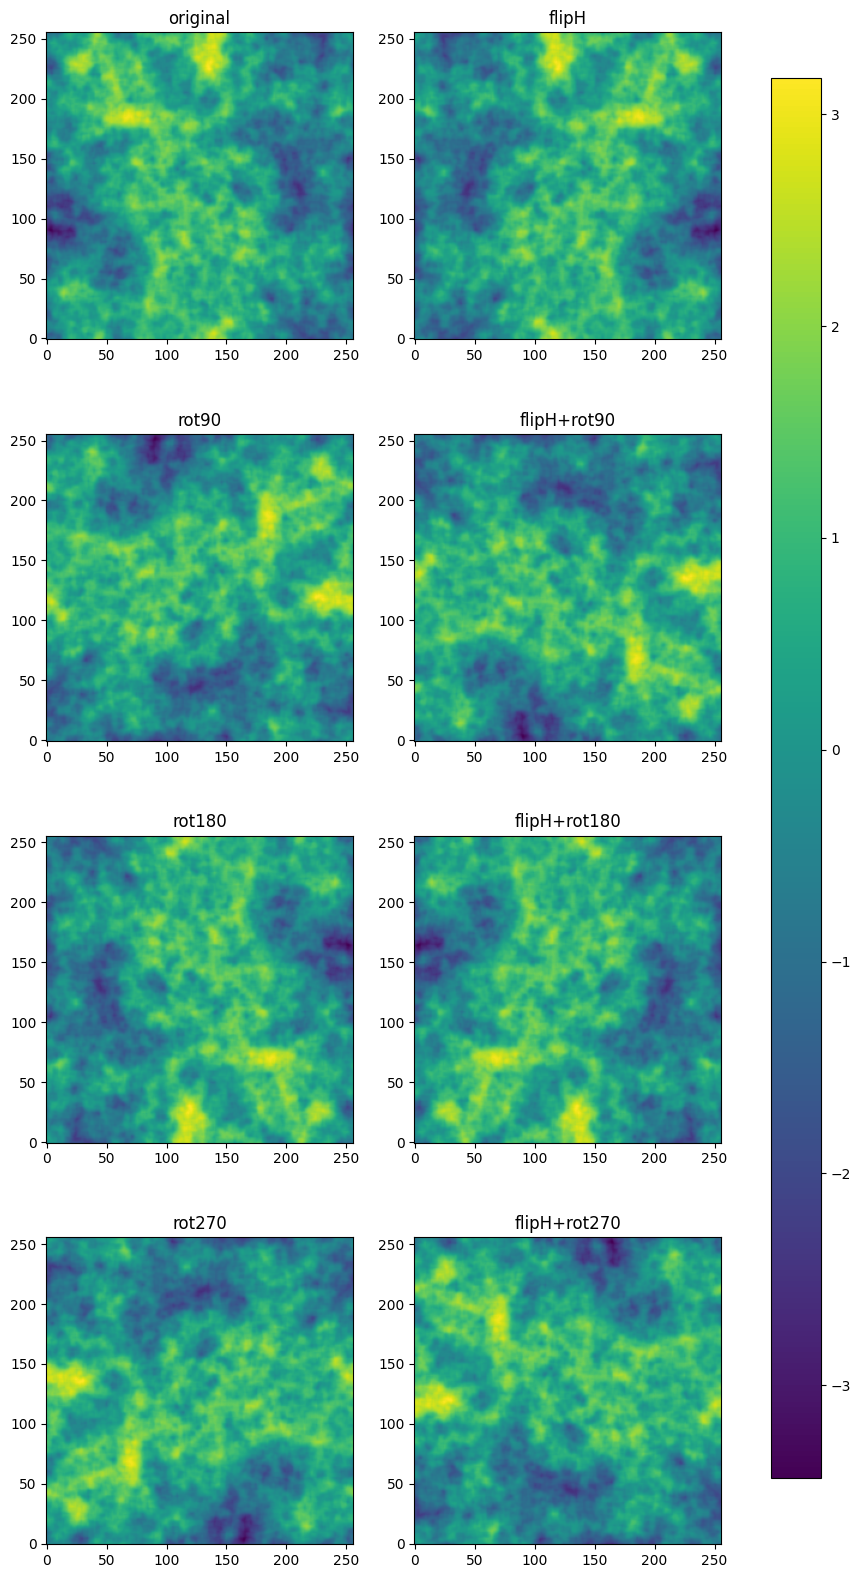

In [8]:
tds = test_set.dataset
# original_sample = tds.get_sample(16523, transformation=tds.all_transformations[0])
# transform_sample = tds.get_sample(16523, transformation=tds.all_transformations[6])
# rc origin lower
plt.rcParams['image.origin'] = 'lower'

fig, ax = plt.subplots(4, 2, figsize=(10, 20))
for i, names in enumerate(zip(orig_names, flip_names)):
    sample = tds.get_sample(5, transformation=tds.all_transformations[i])
    H_sample = tds.get_sample(5, transformation=tds.all_transformations[i+4])
    ax[i, 0].imshow(sample["image"][0, :, :])
    ax[i, 0].set_title(names[0])
    im = ax[i, 1].imshow(H_sample["image"][0, :, :])
    ax[i, 1].set_title(names[1])
# colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im, cax=cbar_ax)
fig.colorbar(im, cax=cbar_ax)
plt.show()